In [2]:
from mlforecast import MLForecast

In [3]:
from mlforecast.auto import AutoMLForecast, AutoLightGBM, AutoXGBoost, AutoRidge

In [4]:
from statsforecast.utils import AirPassengersDF
df = AirPassengersDF
df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


In [ ]:
auto_mlf = AutoMLForecast(
    freq='ME',  # frequency of your time series (e.g., 'D' for daily, 'W' for weekly)
    season_length=12,  # length of seasonality in your data
    models={
        'lgb': AutoLightGBM(),
        'xgb': AutoXGBoost(),
        'ridge': AutoRidge()
    },
    num_threads=4  # number of threads to use for parallel processing
)

In [ ]:
auto_mlf.fit(n_windows=3, df=df, h = 5, num_samples=20)


[I 2024-08-25 20:40:25,506] A new study created in memory with name: no-name-0eb4b82a-b06e-4509-94a0-adab4cff464d
[I 2024-08-25 20:40:25,783] Trial 0 finished with value: 0.056893984287298915 and parameters: {'n_estimators': 169, 'lambda_l1': 0.027334069690310565, 'lambda_l2': 0.0026599310838681858, 'num_leaves': 112, 'feature_fraction': 0.7118273996694524, 'bagging_fraction': 0.8229470565333281, 'objective': 'l2', 'target_transforms_idx': 0, 'lags_idx': 2, 'lag_transforms_idx': 2, 'use_date_features': 0}. Best is trial 0 with value: 0.056893984287298915.
[I 2024-08-25 20:40:25,876] Trial 1 finished with value: 0.07053752230301659 and parameters: {'n_estimators': 422, 'lambda_l1': 1.1600316346542318e-07, 'lambda_l2': 0.005744988873954126, 'num_leaves': 5, 'feature_fraction': 0.972334458524792, 'bagging_fraction': 0.7609241608750359, 'objective': 'l1', 'target_transforms_idx': 0, 'lags_idx': 0, 'lag_transforms_idx': 1, 'use_date_features': 1}. Best is trial 0 with value: 0.0568939842872

AutoMLForecast(models={'lgb': AutoModel(model=LGBMRegressor), 'xgb': AutoModel(model=XGBRegressor), 'ridge': AutoModel(model=Ridge)})

In [ ]:
auto_mlf.predict(h = 5)

,unique_id,ds,lgb,xgb,ridge
0,1.0,1961-01-31,443.309653,444.287494,456.847798
1,1.0,1961-02-28,413.654213,416.056641,428.689291
2,1.0,1961-03-31,442.493393,445.316753,459.456727
3,1.0,1961-04-30,483.866891,489.050229,503.317255
4,1.0,1961-05-31,494.846210,499.993219,526.709148


In [ ]:
auto_mlf.models_

{'lgb': MLForecast(models=[lgb], freq=ME, lag_features=['exponentially_weighted_mean_lag1_alpha0.9', 'rolling_mean_lag12_window_size12_min_samples1'], date_features=['month', 'year'], num_threads=4),
 'xgb': MLForecast(models=[xgb], freq=ME, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'exponentially_weighted_mean_lag1_alpha0.9'], date_features=[], num_threads=4),
 'ridge': MLForecast(models=[ridge], freq=ME, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'exponentially_weighted_mean_lag1_alpha0.9', 'rolling_mean_lag12_window_size12_min_samples1', 'rolling_mean_lag5_window_size12_min_samples1'], date_features=['month', 'year'], num_threads=4)}

In [5]:
from utilsforecast.plotting import plot_series

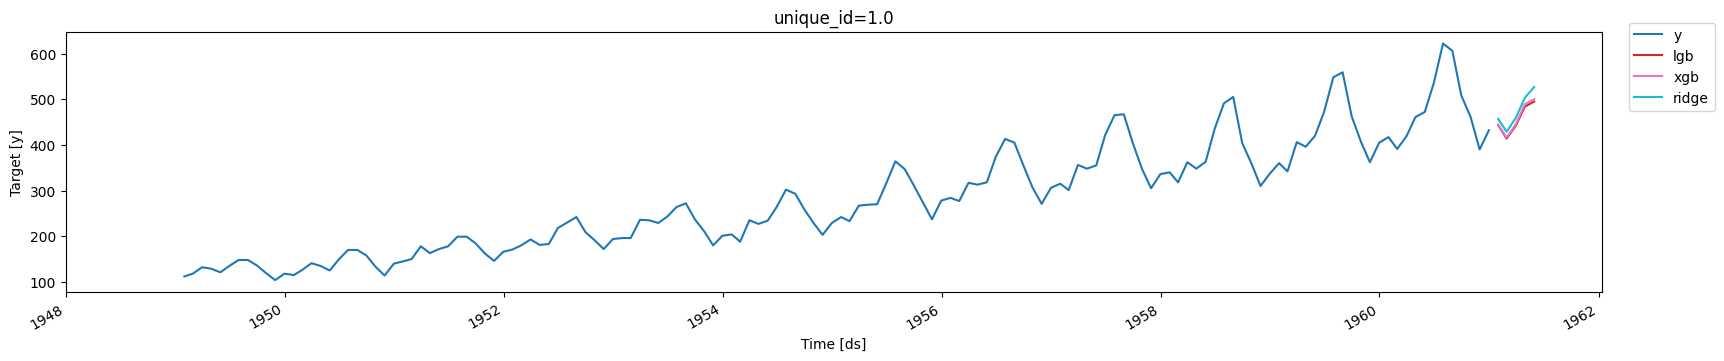

In [ ]:
plot_series(df, auto_mlf.predict(h = 5))

In [6]:
from mlforecast.auto import AutoModel, AutoMLForecast
import optuna

In [7]:
from sklearn.linear_model import (
    LinearRegression, 
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
    QuantileRegressor,
    Lasso, 
    LassoCV,
    Ridge, 
    RidgeCV,
    ElasticNet, 
    ElasticNetCV,

)

In [8]:
def lasso_space(trial):
    return {
        'alpha': trial.suggest_float('alpha', 1e-5, 1, log = True),
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }

def ridge_space(trial):
    return {
        'alpha': trial.suggest_float('alpha', 1e-5, 100, log = True),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 10000),
        'tol': trial.suggest_float('tol', 1e-6, 1e-2,log = True),
        # 'solver': trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']),
        'positive': trial.suggest_categorical('positive', [True, False])
    }

In [18]:
from mlforecast.auto import (
    AutoLightGBM,
    AutoXGBoost,
    AutoCatboost,
    AutoRidge,
    AutoLasso,
    AutoElasticNet,
    AutoLinearRegression,
    AutoRandomForest
)

# Scikit-learn models
from sklearn.linear_model import (
    LinearRegression, 
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
    QuantileRegressor,
    Lasso, 
    LassoCV,
    Ridge, 
    ElasticNet, 
    ElasticNetCV,

)
from sklearn.neighbors import (
    KNeighborsRegressor,
    )

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor)
from sklearn.svm import SVR, LinearSVR

In [24]:
import optuna
from mlforecast.auto import AutoModel, AutoLightGBM, AutoXGBoost, AutoRidge, AutoLasso, AutoElasticNet, AutoLinearRegression, AutoRandomForest

def lasso_space(trial):
    return {
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'selection': trial.suggest_categorical('selection', ['cyclic', 'random'])
    }

def lassocv_space(trial):
    return {
        'eps': trial.suggest_loguniform('eps', 1e-5, 1e-2),
        'n_alphas': trial.suggest_int('n_alphas', 50, 200),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'cv': trial.suggest_int('cv', 3, 10)
    }

def ridge_space(trial):
    return {
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'solver': trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
    }

def linear_regression_space(trial):
    return {
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'positive': trial.suggest_categorical('positive', [True, False])
    }

def theil_sen_space(trial):
    return {
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'max_subpopulation': trial.suggest_int('max_subpopulation', 5000, 20000)
    }

def ransac_space(trial):
    return {
        'max_trials': trial.suggest_int('max_trials', 50, 500),
        'min_samples': trial.suggest_uniform('min_samples', 0.1, 1.0),
        'max_skips': trial.suggest_int('max_skips', int(1e4), int(1e6), log=True),
        'stop_probability': trial.suggest_uniform('stop_probability', 0.90, 0.99)
    }

def huber_space(trial):
    return {
        'epsilon': trial.suggest_uniform('epsilon', 1.1, 2.0),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2)
    }

def quantile_space(trial):
    return {
        'quantile': trial.suggest_uniform('quantile', 0.1, 0.9),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'solver': trial.suggest_categorical('solver', ['highs', 'highs-ds', 'highs-ipm', 'interior-point', 'revised simplex'])
    }

def knn_space(trial):
    return {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size': trial.suggest_int('leaf_size', 10, 50),
        'p': trial.suggest_int('p', 1, 2)
    }

def mlp_space(trial):
    return {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)]),
        'activation': trial.suggest_categorical('activation', ['tanh', 'relu']),
        'solver': trial.suggest_categorical('solver', ['sgd', 'adam']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-2),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),
        'max_iter': trial.suggest_int('max_iter', 100, 500)
    }

def rf_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

def gbm_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0)
    }

def extra_trees_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

def hist_gbm_space(trial):
    return {
        'max_iter': trial.suggest_int('max_iter', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_bins': trial.suggest_int('max_bins', 32, 256),
        'l2_regularization': trial.suggest_loguniform('l2_regularization', 1e-10, 1.0)
    }

def adaboost_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'loss': trial.suggest_categorical('loss', ['linear', 'square', 'exponential'])
    }

def bagging_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_samples': trial.suggest_uniform('max_samples', 0.5, 1.0),
        'max_features': trial.suggest_uniform('max_features', 0.5, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'bootstrap_features': trial.suggest_categorical('bootstrap_features', [True, False])
    }

def svr_space(trial):
    return {
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'C': trial.suggest_loguniform('C', 1e-2, 1e2),
        'epsilon': trial.suggest_loguniform('epsilon', 1e-3, 1.0),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
    }

def linear_svr_space(trial):
    return {
        'epsilon': trial.suggest_loguniform('epsilon', 1e-3, 1.0),
        'C': trial.suggest_loguniform('C', 1e-2, 1e2),
        'loss': trial.suggest_categorical('loss', ['epsilon_insensitive', 'squared_epsilon_insensitive']),
        'intercept_scaling': trial.suggest_loguniform('intercept_scaling', 1e-1, 1e1)
    }

def elastic_net_space(trial):
    return {
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'l1_ratio': trial.suggest_uniform('l1_ratio', 0, 1),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'selection': trial.suggest_categorical('selection', ['cyclic', 'random'])
    }

def elastic_net_cv_space(trial):
    return {
        'l1_ratio': trial.suggest_uniform('l1_ratio', 0, 1),
        'eps': trial.suggest_loguniform('eps', 1e-5, 1e-2),
        'n_alphas': trial.suggest_int('n_alphas', 50, 200),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'cv': trial.suggest_int('cv', 3, 10)
    }

# Now, let's create the auto_models dictionary
auto_models = {
    'lasso': AutoModel(Lasso(random_state=0), lasso_space),
    'lasso_cv': AutoModel(LassoCV(random_state=0), lassocv_space),
    'ridge': AutoModel(Ridge(), ridge_space),
    'linear': AutoModel(LinearRegression(), linear_regression_space),
    'theil_sen': AutoModel(TheilSenRegressor(random_state=0), theil_sen_space),
    'ransac': AutoModel(RANSACRegressor(random_state=0), ransac_space),
    'huber': AutoModel(HuberRegressor(), huber_space),
    'quantile': AutoModel(QuantileRegressor(), quantile_space),
    'knn': AutoModel(KNeighborsRegressor(), knn_space),
    'mlp': AutoModel(MLPRegressor(random_state=0), mlp_space),
    'rf': AutoModel(RandomForestRegressor(random_state=0), rf_space),
    'gbm': AutoModel(GradientBoostingRegressor(random_state=0), gbm_space),
    'extra_trees': AutoModel(ExtraTreesRegressor(random_state=0), extra_trees_space),
    'hist_gbm': AutoModel(HistGradientBoostingRegressor(random_state=0), hist_gbm_space),
    'adaboost': AutoModel(AdaBoostRegressor(random_state=0), adaboost_space),
    'bagging': AutoModel(BaggingRegressor(random_state=0), bagging_space),
    'svr': AutoModel(SVR(), svr_space),
    'linear_svr': AutoModel(LinearSVR(random_state=0), linear_svr_space),
    'elastic': AutoModel(ElasticNet(random_state=0), elastic_net_space),
    'elastic_cv': AutoModel(ElasticNetCV(random_state=0), elastic_net_cv_space),
    'xgb': AutoXGBoost(),
    'lgb': AutoLightGBM(),
    'ridge2': AutoRidge(),
    'lasso2': AutoLasso(),
    'elastic_net2': AutoElasticNet(),
    'linear2': AutoLinearRegression(),
    'rf2': AutoRandomForest()
}

In [26]:
auto_models

{'lasso': AutoModel(model=Lasso),
 'lasso_cv': AutoModel(model=LassoCV),
 'ridge': AutoModel(model=Ridge),
 'linear': AutoModel(model=LinearRegression),
 'theil_sen': AutoModel(model=TheilSenRegressor),
 'ransac': AutoModel(model=RANSACRegressor),
 'huber': AutoModel(model=HuberRegressor),
 'quantile': AutoModel(model=QuantileRegressor),
 'knn': AutoModel(model=KNeighborsRegressor),
 'mlp': AutoModel(model=MLPRegressor),
 'rf': AutoModel(model=RandomForestRegressor),
 'gbm': AutoModel(model=GradientBoostingRegressor),
 'extra_trees': AutoModel(model=ExtraTreesRegressor),
 'hist_gbm': AutoModel(model=HistGradientBoostingRegressor),
 'adaboost': AutoModel(model=AdaBoostRegressor),
 'bagging': AutoModel(model=BaggingRegressor),
 'svr': AutoModel(model=SVR),
 'linear_svr': AutoModel(model=LinearSVR),
 'elastic': AutoModel(model=ElasticNet),
 'elastic_cv': AutoModel(model=ElasticNetCV),
 'xgb': AutoModel(model=XGBRegressor),
 'lgb': AutoModel(model=LGBMRegressor),
 'ridge2': AutoModel(model

In [12]:
from utilsforecast.losses import mae

In [13]:
def custom_loss(df, train_df=None):  # train_df is not used but included for compatibility
    result = mae(df, models=['model'])
    return result['model'].mean()

In [58]:
# Feature Engineering (MLForecast init params)
def init_config(trial):
    return {
        'lags': trial.suggest_categorical('lags', [[1,7], [1,7,14]]),
        'target_transforms': trial.suggest_categorical('target_transforms', [None, [LocalStandardScaler()]]),
        'lag_transforms': trial.suggest_categorical('lag_transforms', [None, {1: [ExponentiallyWeightedMean(0.9)]}]),
        'date_features': trial.suggest_categorical('date_features', [None, ['month', 'year']])
    }

In [14]:
auto_mlf = AutoMLForecast(
    freq='ME',  # frequency of your time series (e.g., 'D' for daily, 'W' for weekly)
    season_length=12,  # length of seasonality in your data
    models=auto_models,
    num_threads=4  # number of threads to use for parallel processing
)

In [27]:
auto_mlf.fit(n_windows=3, df=df, h = 12, num_samples=30, loss=custom_loss)

[I 2024-08-25 21:24:30,983] A new study created in memory with name: no-name-4744ec32-6aca-420d-8d54-a87f3e388ece
[I 2024-08-25 21:24:31,199] Trial 0 finished with value: 22.643316041568124 and parameters: {'alpha': 0.0694535625742477, 'fit_intercept': True, 'max_iter': 5494, 'tol': 4.9501595537331986e-05, 'positive': True, 'target_transforms_idx': 1, 'lags_idx': 1, 'lag_transforms_idx': 2, 'use_date_features': 1}. Best is trial 0 with value: 22.643316041568124.
[I 2024-08-25 21:24:31,201] Trial 1 finished with value: inf and parameters: {'alpha': 3.9274435316349363, 'fit_intercept': False, 'max_iter': 1271, 'tol': 0.00036281404040243816, 'positive': False, 'target_transforms_idx': 3, 'lags_idx': 0, 'lag_transforms_idx': 0, 'use_date_features': 0}. Best is trial 0 with value: 22.643316041568124.
[I 2024-08-25 21:24:31,304] Trial 2 finished with value: 199.7662976743288 and parameters: {'alpha': 0.7645719685939685, 'fit_intercept': False, 'max_iter': 6739, 'tol': 6.942729492430145e-06, 

AutoMLForecast(models={'ridge': AutoModel(model=Ridge), 'lasso': AutoModel(model=Lasso), 'lgb': AutoModel(model=LGBMRegressor), 'xgb': AutoModel(model=XGBRegressor), 'ridge2': AutoModel(model=Ridge), 'lasso2': AutoModel(model=Lasso), 'elastic_net': AutoModel(model=ElasticNet), 'linear': AutoModel(model=LinearRegression), 'rf': AutoModel(model=RandomForestRegressor)})

In [48]:
auto_mlf.fit_config


<function mlforecast.auto.AutoMLForecast.__init__.<locals>.<lambda>(trial)>

In [56]:
auto_mlf.results_['ridge'].best_params

{'alpha': 8.088061612153108,
 'fit_intercept': False,
 'max_iter': 8711,
 'tol': 3.2427919007365154e-06,
 'positive': True,
 'target_transforms_idx': 1,
 'lags_idx': 1,
 'lag_transforms_idx': 0,
 'use_date_features': 1}

In [57]:
for model_name, study in auto_mlf.results_.items():
    best_trial = study.best_trial
    best_config = best_trial.user_attrs['config']
    
    print(f"Best configuration for {model_name}:")
    print(f"  Target transforms: {best_config['mlf_init_params'].get('target_transforms')}")
    print(f"  Lags: {best_config['mlf_init_params'].get('lags')}")
    print(f"  Lag transforms: {best_config['mlf_init_params'].get('lag_transforms')}")
    print(f"  Date features: {best_config['mlf_init_params'].get('date_features')}")
    print(f"  Model params: {best_config['model_params']}")
    print(f"  MLForecast fit params: {best_config['mlf_fit_params']}")
    print(f"  Best value: {best_trial.value}")
    print()

Best configuration for ridge:
  Target transforms: [<mlforecast.target_transforms.LocalStandardScaler object at 0x000002809C232900>]
  Lags: [12]
  Lag transforms: None
  Date features: ['month', 'year']
  Model params: {'alpha': 8.088061612153108, 'fit_intercept': False, 'max_iter': 8711, 'tol': 3.2427919007365154e-06, 'positive': True}
  MLForecast fit params: {}
  Best value: 17.906785598884

Best configuration for lasso:
  Target transforms: [<mlforecast.target_transforms.Differences object at 0x000002809C2ECA10>, <mlforecast.target_transforms.LocalStandardScaler object at 0x000002809C2ED100>]
  Lags: range(1, 13)
  Lag transforms: {1: [ExponentiallyWeightedMean(alpha=0.9)]}
  Date features: None
  Model params: {'alpha': 1.0517741365684144e-05, 'max_iter': 618}
  MLForecast fit params: {}
  Best value: 17.933044872193218

Best configuration for lgb:
  Target transforms: [<mlforecast.target_transforms.Differences object at 0x0000028083FD5DF0>, <mlforecast.target_transforms.LocalSta

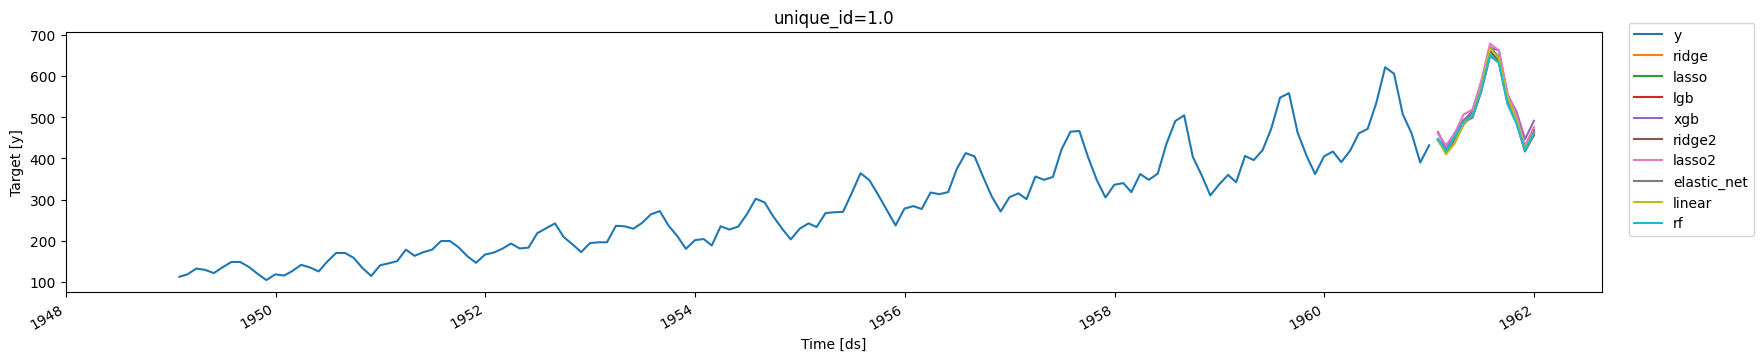

In [22]:
plot_series(df, auto_mlf.predict(h = 12))